# <h1 style='background:#f5b942; border:2; border-radius: 10px; font-size:150%; font-weight: bold; color:black'><center>Table Of Content </center></h1>

* [INTRODUCTION](#1)
* [IMPORT LIBRARIES](#2)
* [READ AND ANALYSIS THE DATA](#3)
* [EXPLORATORY DATA ANALYSIS](#4)
   * [UNIVARIATE ANALYSIS](#4.1)
   * [BIVARIATE ANALYSIS](#4.2)
   * [CORRELATION MATRIX ANALYSIS](#4.3)
* [DATA PROCESSING](#5)
   * [OUTLAIR DETECTION AND REMOVE](#5.1)
   * [ENCODING CATEGORICAL VARIABLES](#5.2)
   * [FEATURE EXTRACTION ](#5.3)
   * [PEARSON CORRELATION ANALYSIS](#5.4)
   * [HANDLE IMBLANCE DATA](#5.5)

* [MODEL BUILDING](#6)
     * [RANDOM FOREST](#6.2)
       * [HYPERPARAMETER TUNING](#6.2.1)
       * [EVALUATION MODEL](#6.2.2)
          * [CLASSIFICATION REPORT](#6.2.2.1)
          * [CONFUSION MATRIX](#6.2.2.2)
          * [ROC CURVE](#6.2.2.3)
       * [FEATURE IMPORTANCE](#6.2.3)


* [CONCLUTION](#8)


<a id="1"></a>

# <h1 style='background:#f57242; border:2; border-radius: 10px; font-size:150%; font-weight: bold; color:black'><center>INTRODUCTION </center></h1>

The Personal Key Indicators of Heart Disease dataset contains 320K rows and 18 columns. It is a cleaned, smaller version of the 2020 annual CDC (Centers for Disease Control and Prevention) survey data of 400k adults. For each patient (row), it contains the health status of that individual. The data was collected in the form of surveys conducted over the phone. Each year, the CDC calls around 400K U.S residents and asks them about their health status, with the vast majority of questions being yes or no questions. Below is a description of the features collected for each patient:

#### <h4 style='background:#f57242; border:2; border-radius: 10px; font-size:100%; font-weight: bold; color:black'><center>Feature	Description </center></h4>
1	HeartDisease	Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
2	BMI	Body Mass Index (BMI)
3	Smoking	Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
4	AlcoholDrinking	Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
5	Stroke	(Ever told) (you had) a stroke?
6	PhysicalHealth	Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30
7	MentalHealth	Thinking about your mental health, for how many days during the past 30 days was your mental health not good?
8	DiffWalking	Do you have serious difficulty walking or climbing stairs?
9	Sex	Are you male or female?
10	AgeCategory	Fourteen-level age category
11	Race	Imputed race/ethnicity value
12	Diabetic	(Ever told) (you had) diabetes?
13	PhysicalActivity	Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
14	GenHealth	Would you say that in general your health is...
15	SleepTime	On average, how many hours of sleep do you get in a 24-hour period?
16	Asthma	(Ever told) (you had) asthma?
17	KidneyDisease	Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
18	SkinCancer	(Ever told) (you had) skin cancer?

 
1.<b>Classification  Algorithms such as:</b> KNN, Naive Bayes, Decision Tree, Random Forest, MLP, SVM. <br>

2. This notebook aims to train a baseline model using a simple CV strategy/GridSearch/Randomized Search as advance techniques we  will use <b>OPTUNA</b><br>

3. After building a succesful model we will deploy the model using <b>FAST API</b>. <br> 



<a id="2"></a>
# <h1 style='background:#f5b942; border:2; border-radius: 5px; font-size:150%; font-weight: bold; color:black'><center>PACKAGE IMPORTS </center></h1>

In [4]:
import numpy as np # Linear Algebra
import pandas as pd # Handling DataFrame
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns
from qbstyles import mpl_style
mpl_style(dark=True)
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report



import re
import warnings # To mitigate any unwanted warnings
warnings.filterwarnings('ignore')

<a id="3"></a>
# <h1 style='background:#69f5a8; border:2; border-radius: 10px; font-size:150%; font-weight: bold; color:black'><center>READ AND ANALYSIS DATA </center></h1>

In [2]:
heart_data = pd.read_csv('https://raw.githubusercontent.com/ds-mahbub/24MLE01_Machine-Learning-Engineer/KNN/Classification/data/heart_disease.csv')
heart_data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
def rename_columns(data):
    new_columns = []
    for column in data.columns:
        new_column_name = re.sub(r'(?<!^)(?=[A-Z][a-z])', '_', column).lower()
        new_columns.append(new_column_name)
    data.columns = new_columns
rename_columns(heart_data)
print(heart_data.columns)

Index(['heart_disease', 'bmi', 'smoking', 'alcohol_drinking', 'stroke',
       'physical_health', 'mental_health', 'diff_walking', 'sex',
       'age_category', 'race', 'diabetic', 'physical_activity', 'gen_health',
       'sleep_time', 'asthma', 'kidney_disease', 'skin_cancer'],
      dtype='object')


In [4]:
print(f"Summary Of The Dataset with numerical columns :")
heart_data.describe().style.set_properties(**{"background-color": "#c6f7d3","color":"#1c0708","border": "1.5px solid black"})

Summary Of The Dataset with numerical columns :


,bmi,physical_health,mental_health,sleep_time
count,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.371710,3.898366,7.097075
std,6.356100,7.950850,7.955235,1.436007
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [5]:
# Information about the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   heart_disease      319795 non-null  object 
 1   bmi                319795 non-null  float64
 2   smoking            319795 non-null  object 
 3   alcohol_drinking   319795 non-null  object 
 4   stroke             319795 non-null  object 
 5   physical_health    319795 non-null  float64
 6   mental_health      319795 non-null  float64
 7   diff_walking       319795 non-null  object 
 8   sex                319795 non-null  object 
 9   age_category       319795 non-null  object 
 10  race               319795 non-null  object 
 11  diabetic           319795 non-null  object 
 12  physical_activity  319795 non-null  object 
 13  gen_health         319795 non-null  object 
 14  sleep_time         319795 non-null  float64
 15  asthma             319795 non-null  object 
 16  ki

In [6]:
# Checking Missing and duplicates
print(f'Number of Missing values: \n{heart_data.isna().sum()}')
print('---------------------------------------------------')
print(f'Number of Duplicate values: {heart_data.duplicated().sum()}')

Number of Missing values: 
heart_disease        0
bmi                  0
smoking              0
alcohol_drinking     0
stroke               0
physical_health      0
mental_health        0
diff_walking         0
sex                  0
age_category         0
race                 0
diabetic             0
physical_activity    0
gen_health           0
sleep_time           0
asthma               0
kidney_disease       0
skin_cancer          0
dtype: int64
---------------------------------------------------
Number of Duplicate values: 18078


In [7]:
# Dropping the duplicate values
heart_data.drop_duplicates(inplace = True)

In [8]:
# Unique value of each colulmns
for column in heart_data.columns:
     print(f"{column}:--->{len(heart_data[column].unique())}")

heart_disease:--->2
bmi:--->3604
smoking:--->2
alcohol_drinking:--->2
stroke:--->2
physical_health:--->31
mental_health:--->31
diff_walking:--->2
sex:--->2
age_category:--->13
race:--->6
diabetic:--->4
physical_activity:--->2
gen_health:--->5
sleep_time:--->24
asthma:--->2
kidney_disease:--->2
skin_cancer:--->2


In [9]:
# Getting the numerical columns
num_cols = heart_data.select_dtypes(include = ['number']).columns.tolist()
cat_cols = heart_data.select_dtypes(include = ['object', 'category']).columns.tolist()

print(f'Numerical Columns: \n{num_cols}\n\nCategorical Columns: \n{cat_cols}')

Numerical Columns: 
['bmi', 'physical_health', 'mental_health', 'sleep_time']

Categorical Columns: 
['heart_disease', 'smoking', 'alcohol_drinking', 'stroke', 'diff_walking', 'sex', 'age_category', 'race', 'diabetic', 'physical_activity', 'gen_health', 'asthma', 'kidney_disease', 'skin_cancer']


<a id="4"></a>
# <h1 style='background:#3bebdc; border:2; border-radius: 10px; font-size:150%; font-weight: bold; color:black'><center>EXPLORATORY DATA ANALYSIS</center></h1>


<a id="4.1"></a>
# <h6 style='background:#3bebdc;border-radius: 10px; font-size:120%; font-weight: bold; color:black'><center>Univariate Analysis </center></h4>

In [10]:
clr_map = ['#FF5733', '#33FF57', '#3373FF', '#FF33F3', '#B4FFE4']

 Univariate analysis for bmi column:
 Univariate analysis for physical_health column:
 Univariate analysis for mental_health column:
 Univariate analysis for sleep_time column:


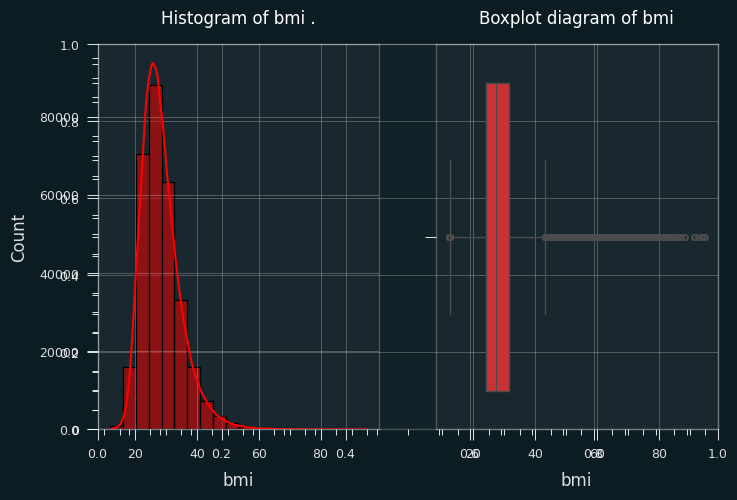

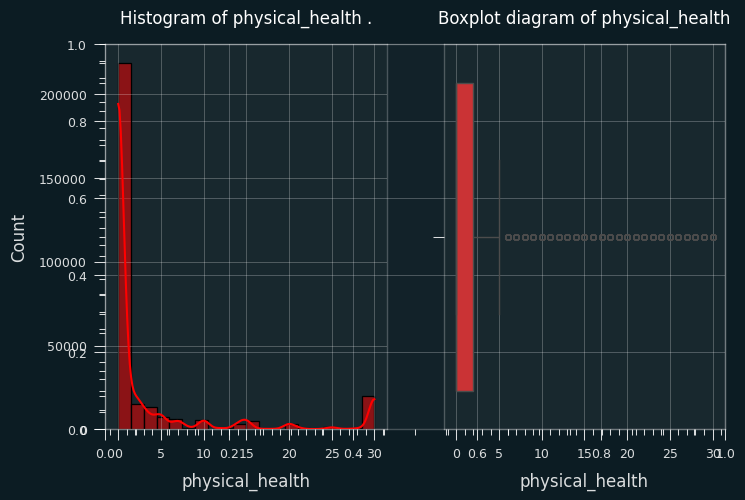

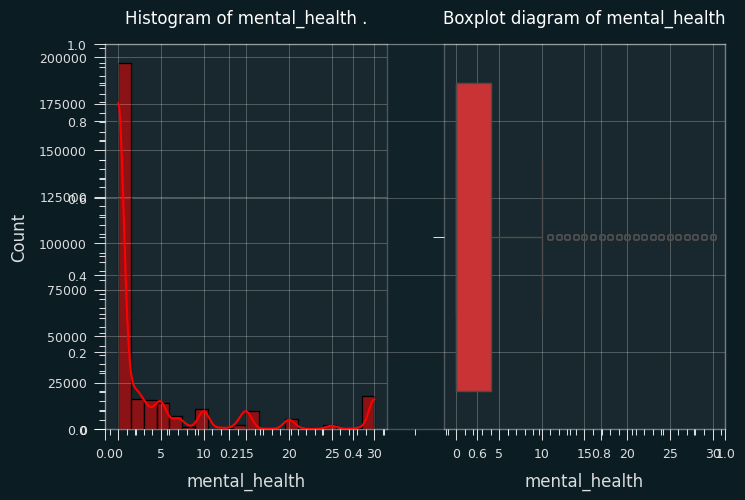

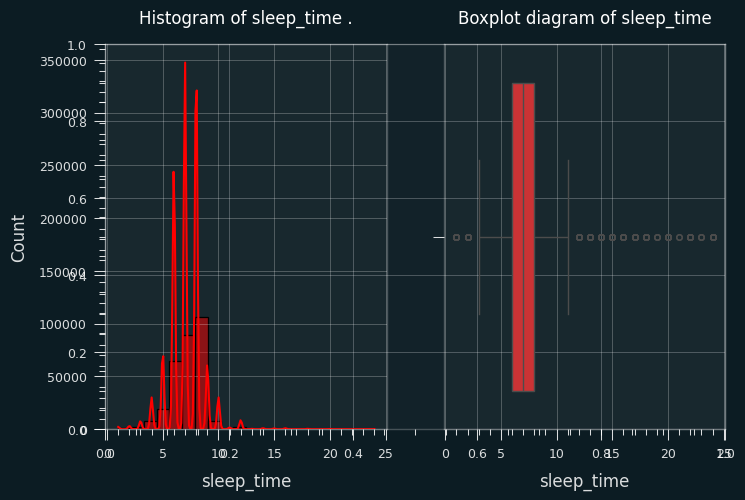

In [11]:
num_cols=['bmi', 'physical_health', 'mental_health', 'sleep_time']
def univariate_analysis_numeric(col):
    fig, ax = plt.subplots(1, 2, figsize=(8,5))    
    sns.histplot(x=heart_data[col], kde=True, bins=20, color='Red',ax=ax[0])
    ax[0].set_title(f'Histogram of {col} .')
    
    sns.boxplot(x=heart_data[col],ax=ax[1])
    ax[1].set_title(f'Boxplot diagram of {col}')
    
for col in num_cols:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_numeric(col)

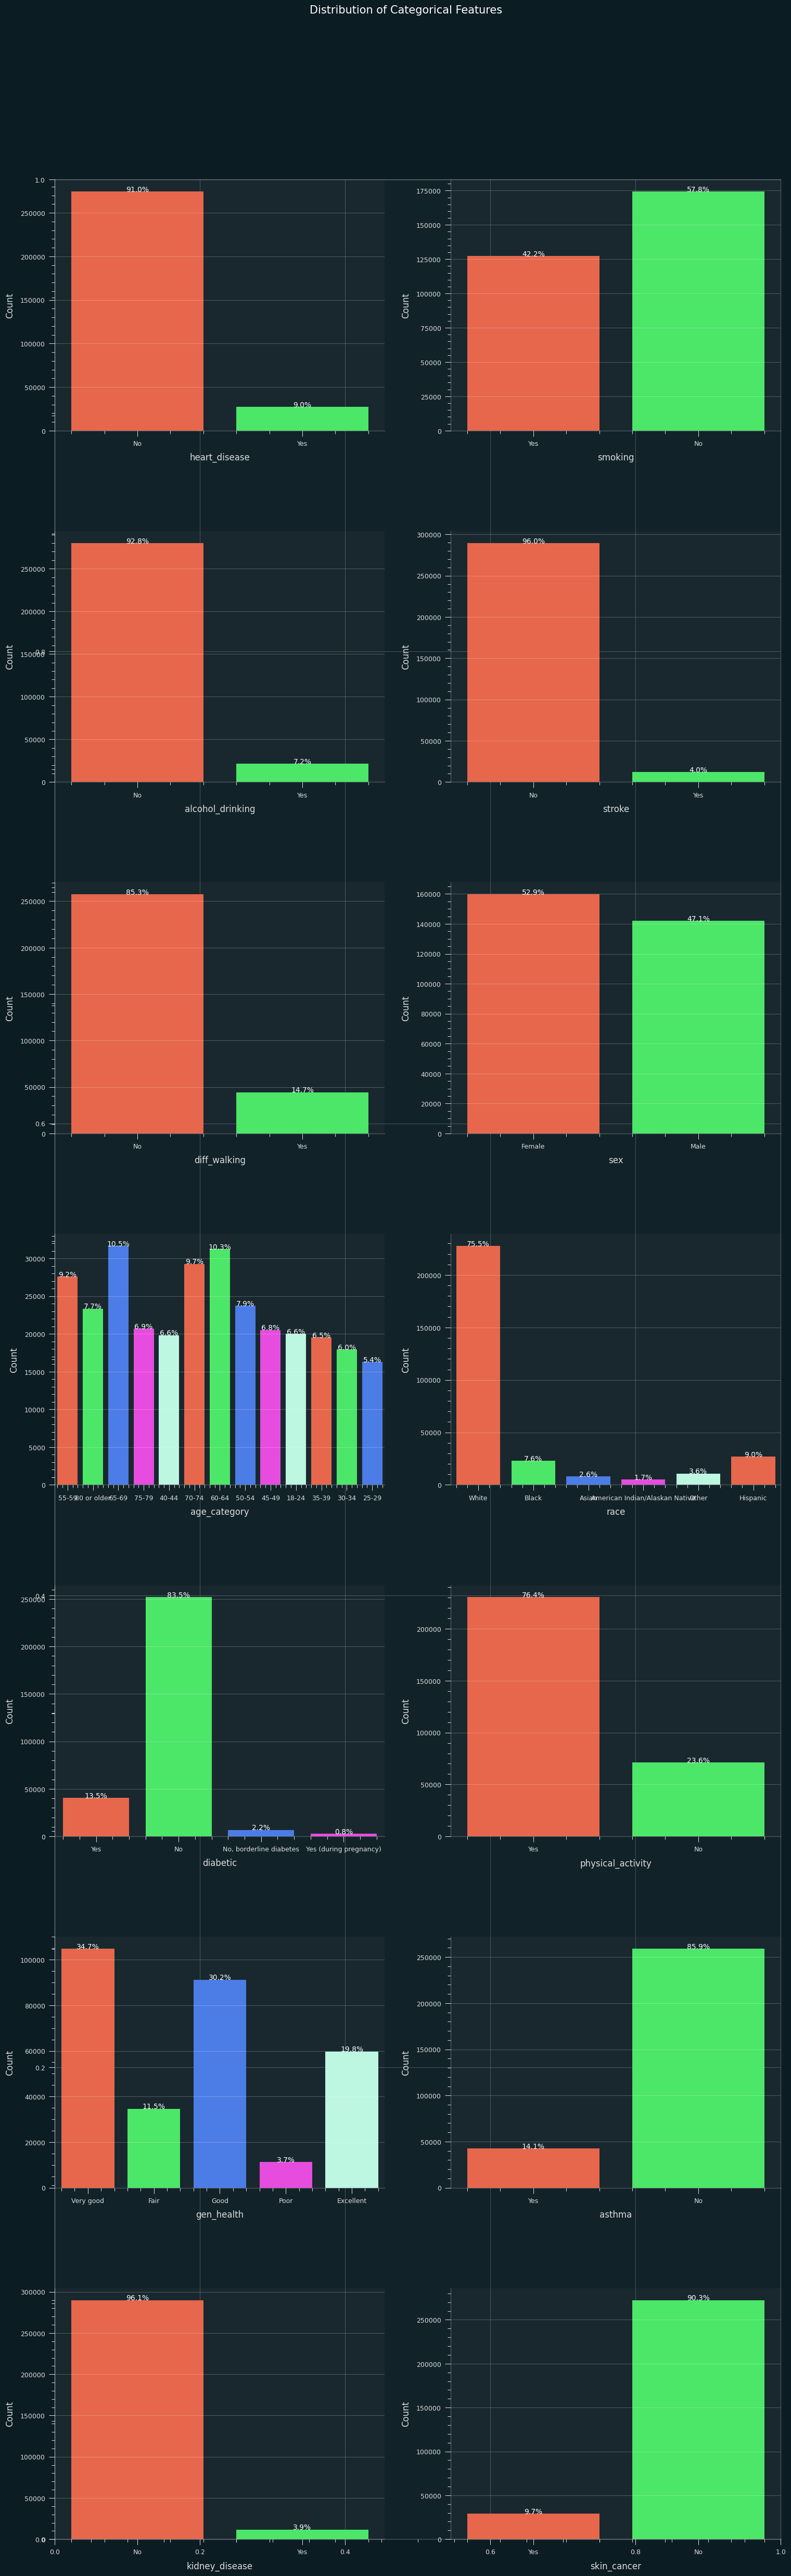

In [12]:
cat_feats = ['heart_disease', 'smoking', 'alcohol_drinking', 'stroke', 'diff_walking', 'sex', 'age_category', 'race', 'diabetic', 'physical_activity', 'gen_health', 'asthma', 'kidney_disease', 'skin_cancer']

L = len(cat_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(18, 8 * nrow), )
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2)  

i = 0
for col in cat_feats:
    ax = axs[i // ncol, i % ncol]
    sns.countplot(data=heart_data, x=col, palette=clr_map, ax=ax)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    sns.despine(right=True, ax=ax)
    sns.despine(offset=0, trim=False, ax=ax)

    total = float(len(heart_data))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

    i += 1
    
if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features', fontsize=15)
plt.show()

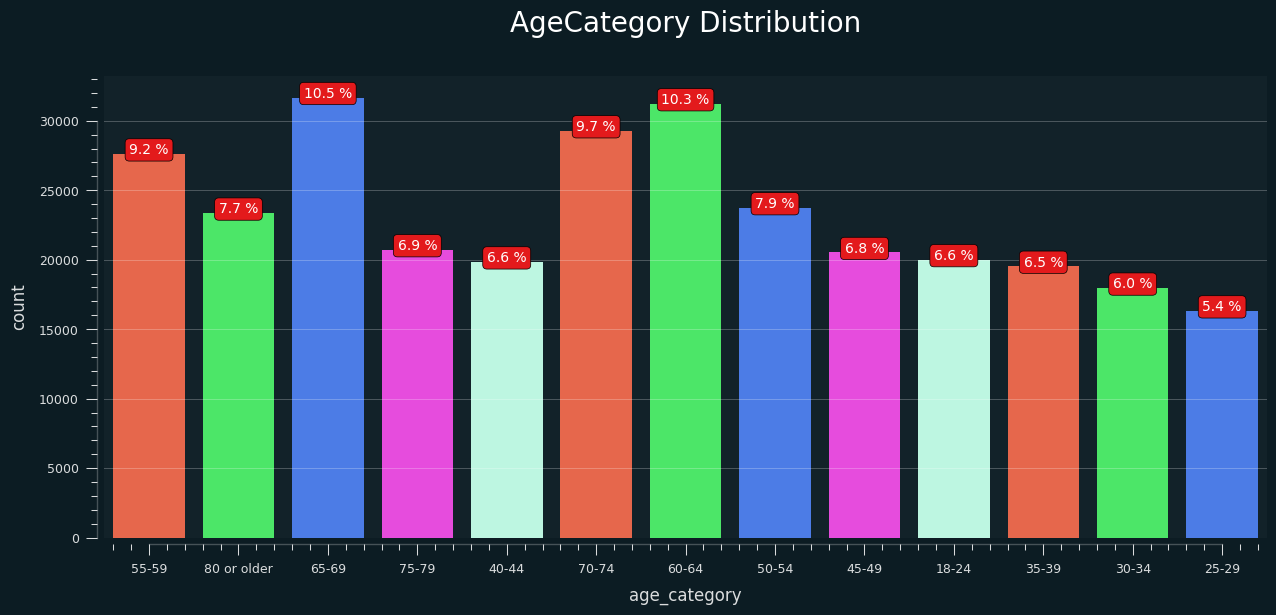

In [13]:
plt.figure(figsize=(15, 6))
total = float(len(heart_data))
ax = sns.countplot(x=heart_data['age_category'], palette=clr_map)


for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('AgeCategory Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

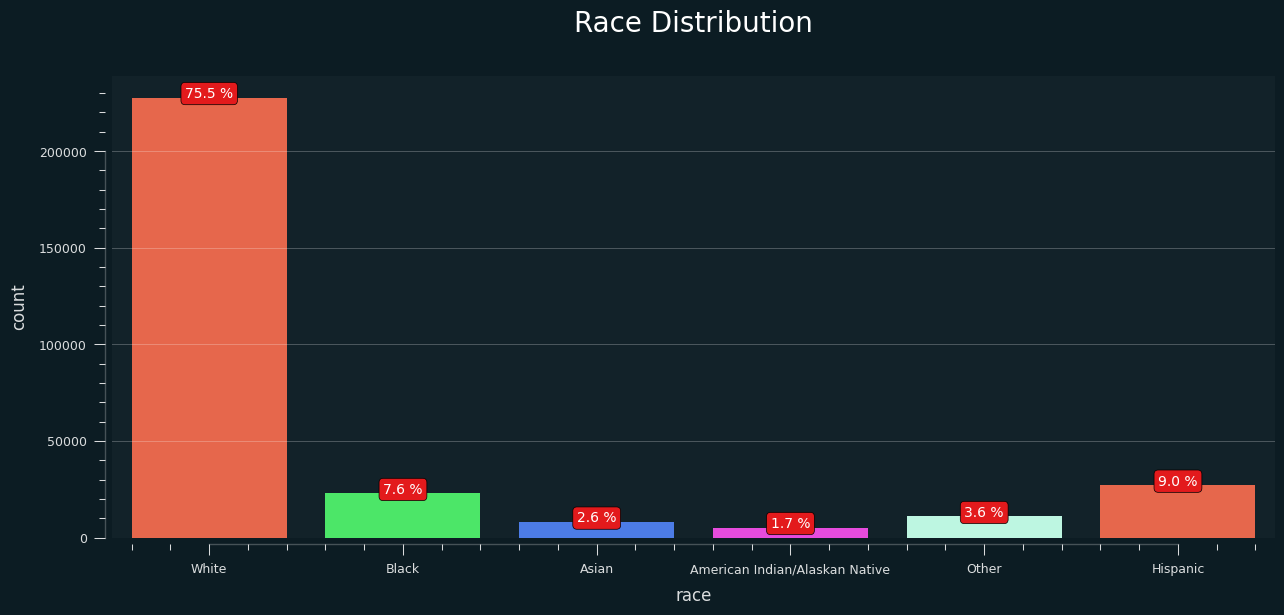

In [14]:
plt.figure(figsize=(15, 6))
total = float(len(heart_data))
ax = sns.countplot(x=heart_data['race'], palette=clr_map)


for p in ax.patches:
    
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Race Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

<a id="4.2"></a>
# <h1 style='background:#3bebdc;border-radius: 10px; font-size:120%; font-weight: bold; color:black'><center>Bivariate Analysis </center> </h1>

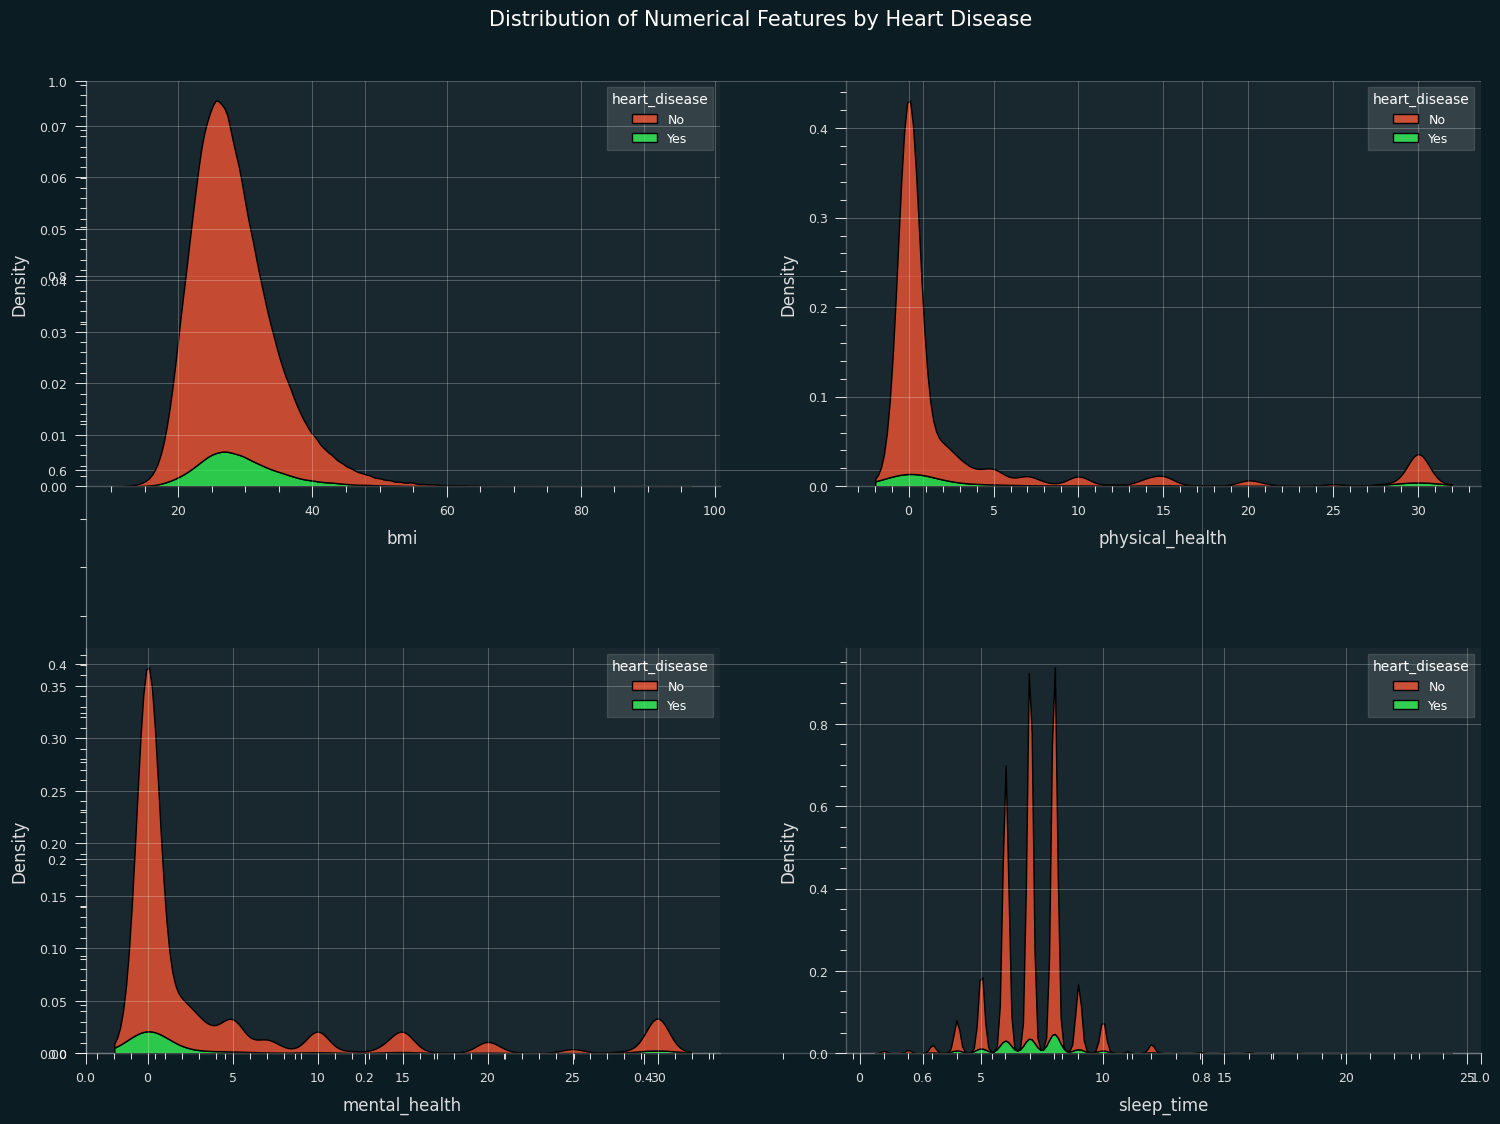

In [15]:
num_feats = ['bmi', 'physical_health', 'mental_health', 'sleep_time']
L = len(num_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, ax = plt.subplots(nrow, ncol, figsize=(18, 6 * nrow))
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2) 

i = 0
for col in num_feats:
    plt.subplot(nrow, ncol, i + 1)

    sns.kdeplot(data=heart_data, x=col, hue="heart_disease", multiple="stack", palette=clr_map)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)

    i += 1

plt.suptitle('Distribution of Numerical Features by Heart Disease', fontsize=15)
plt.show()

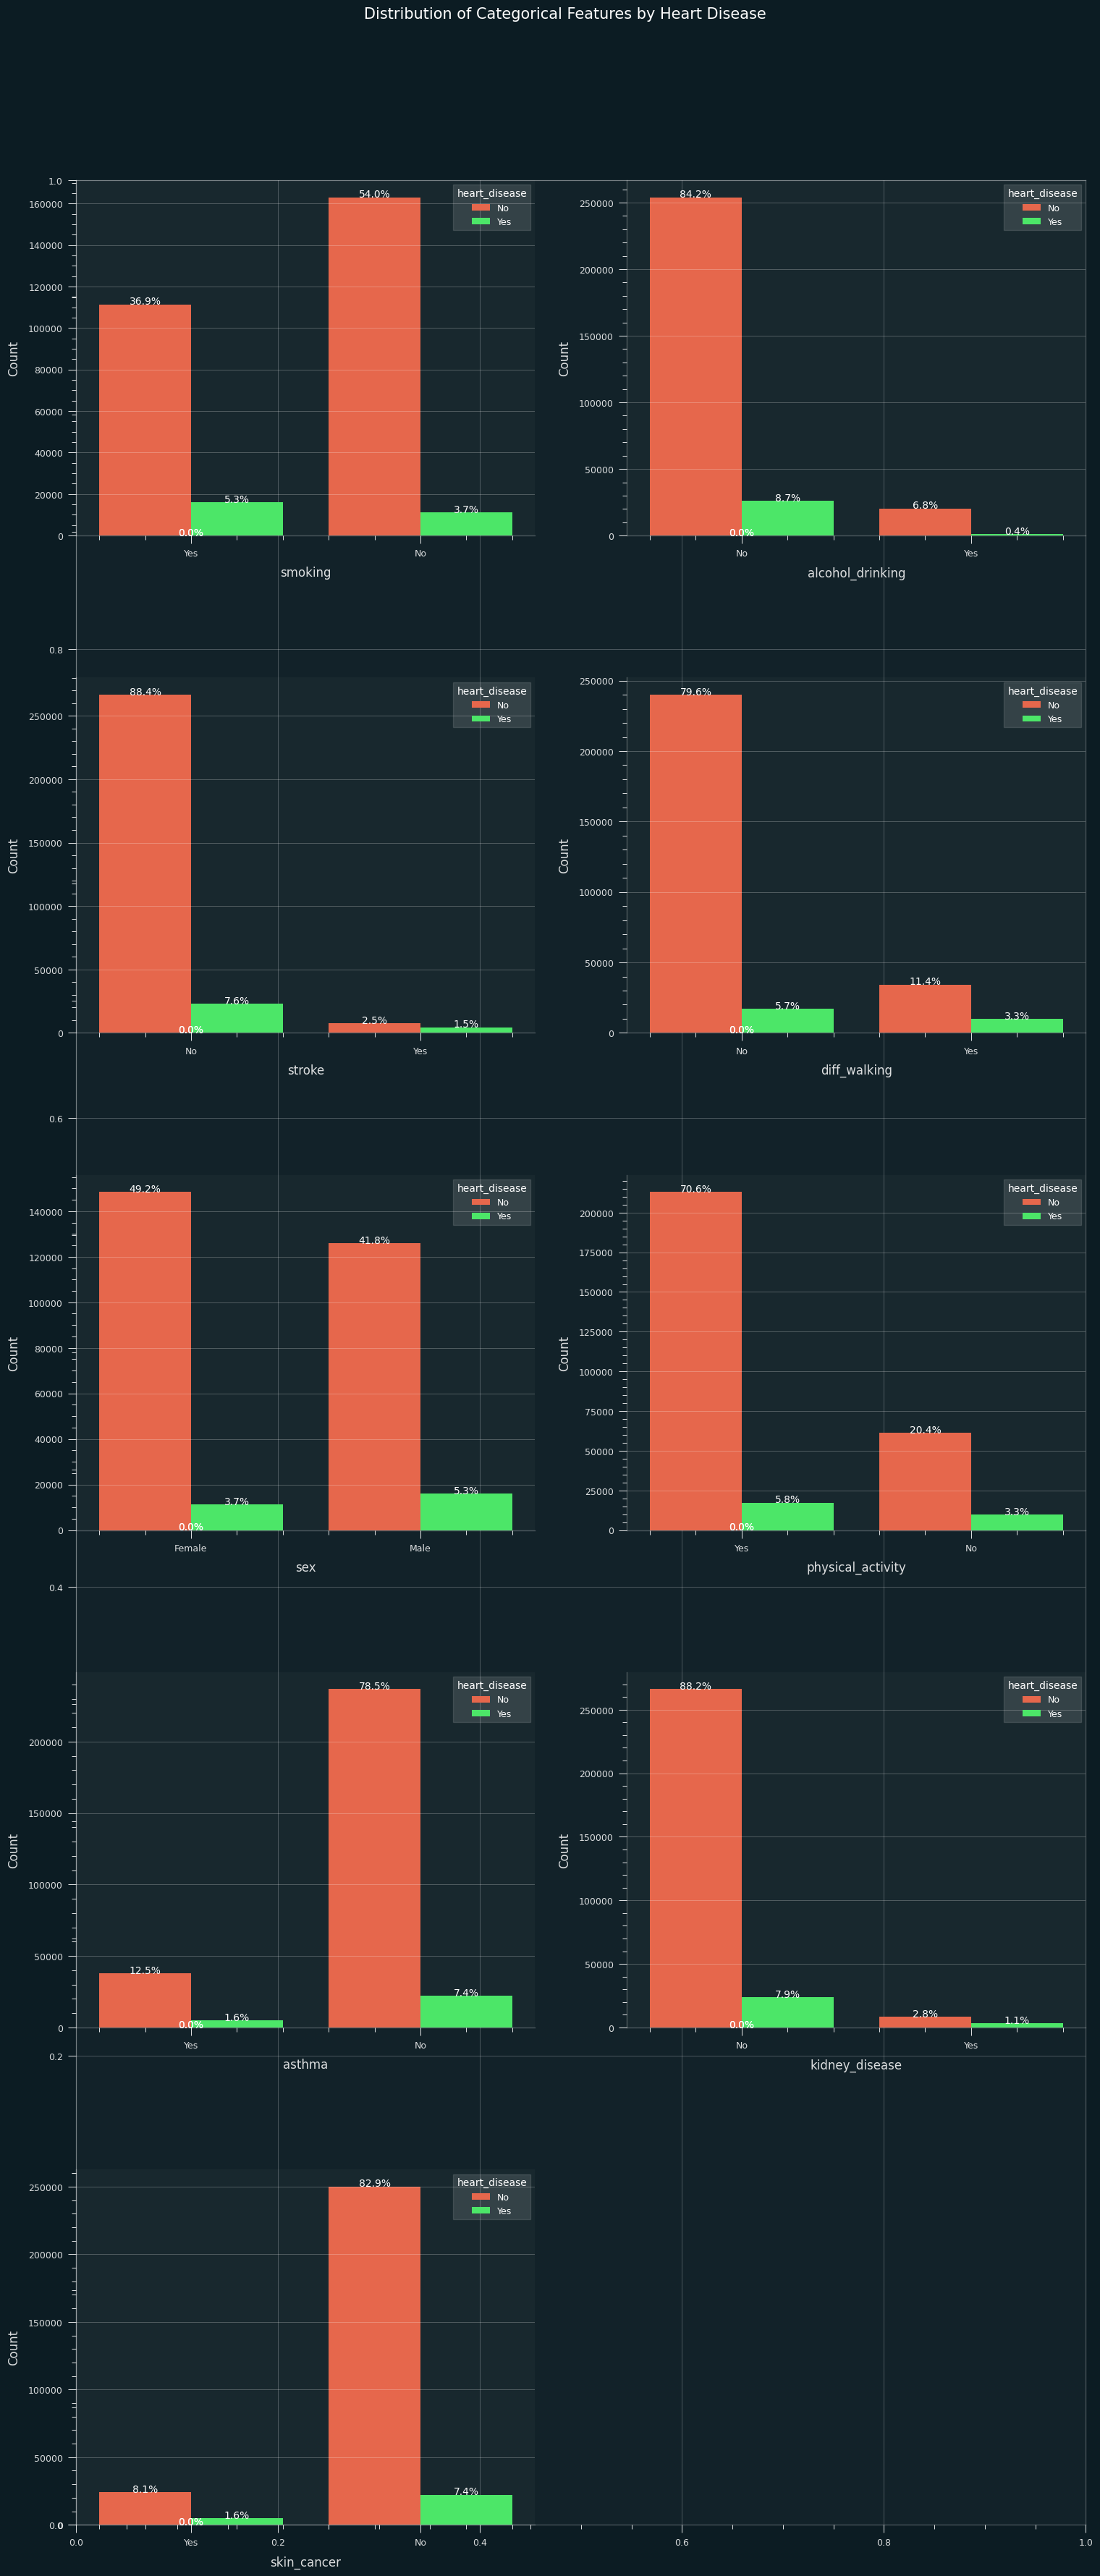

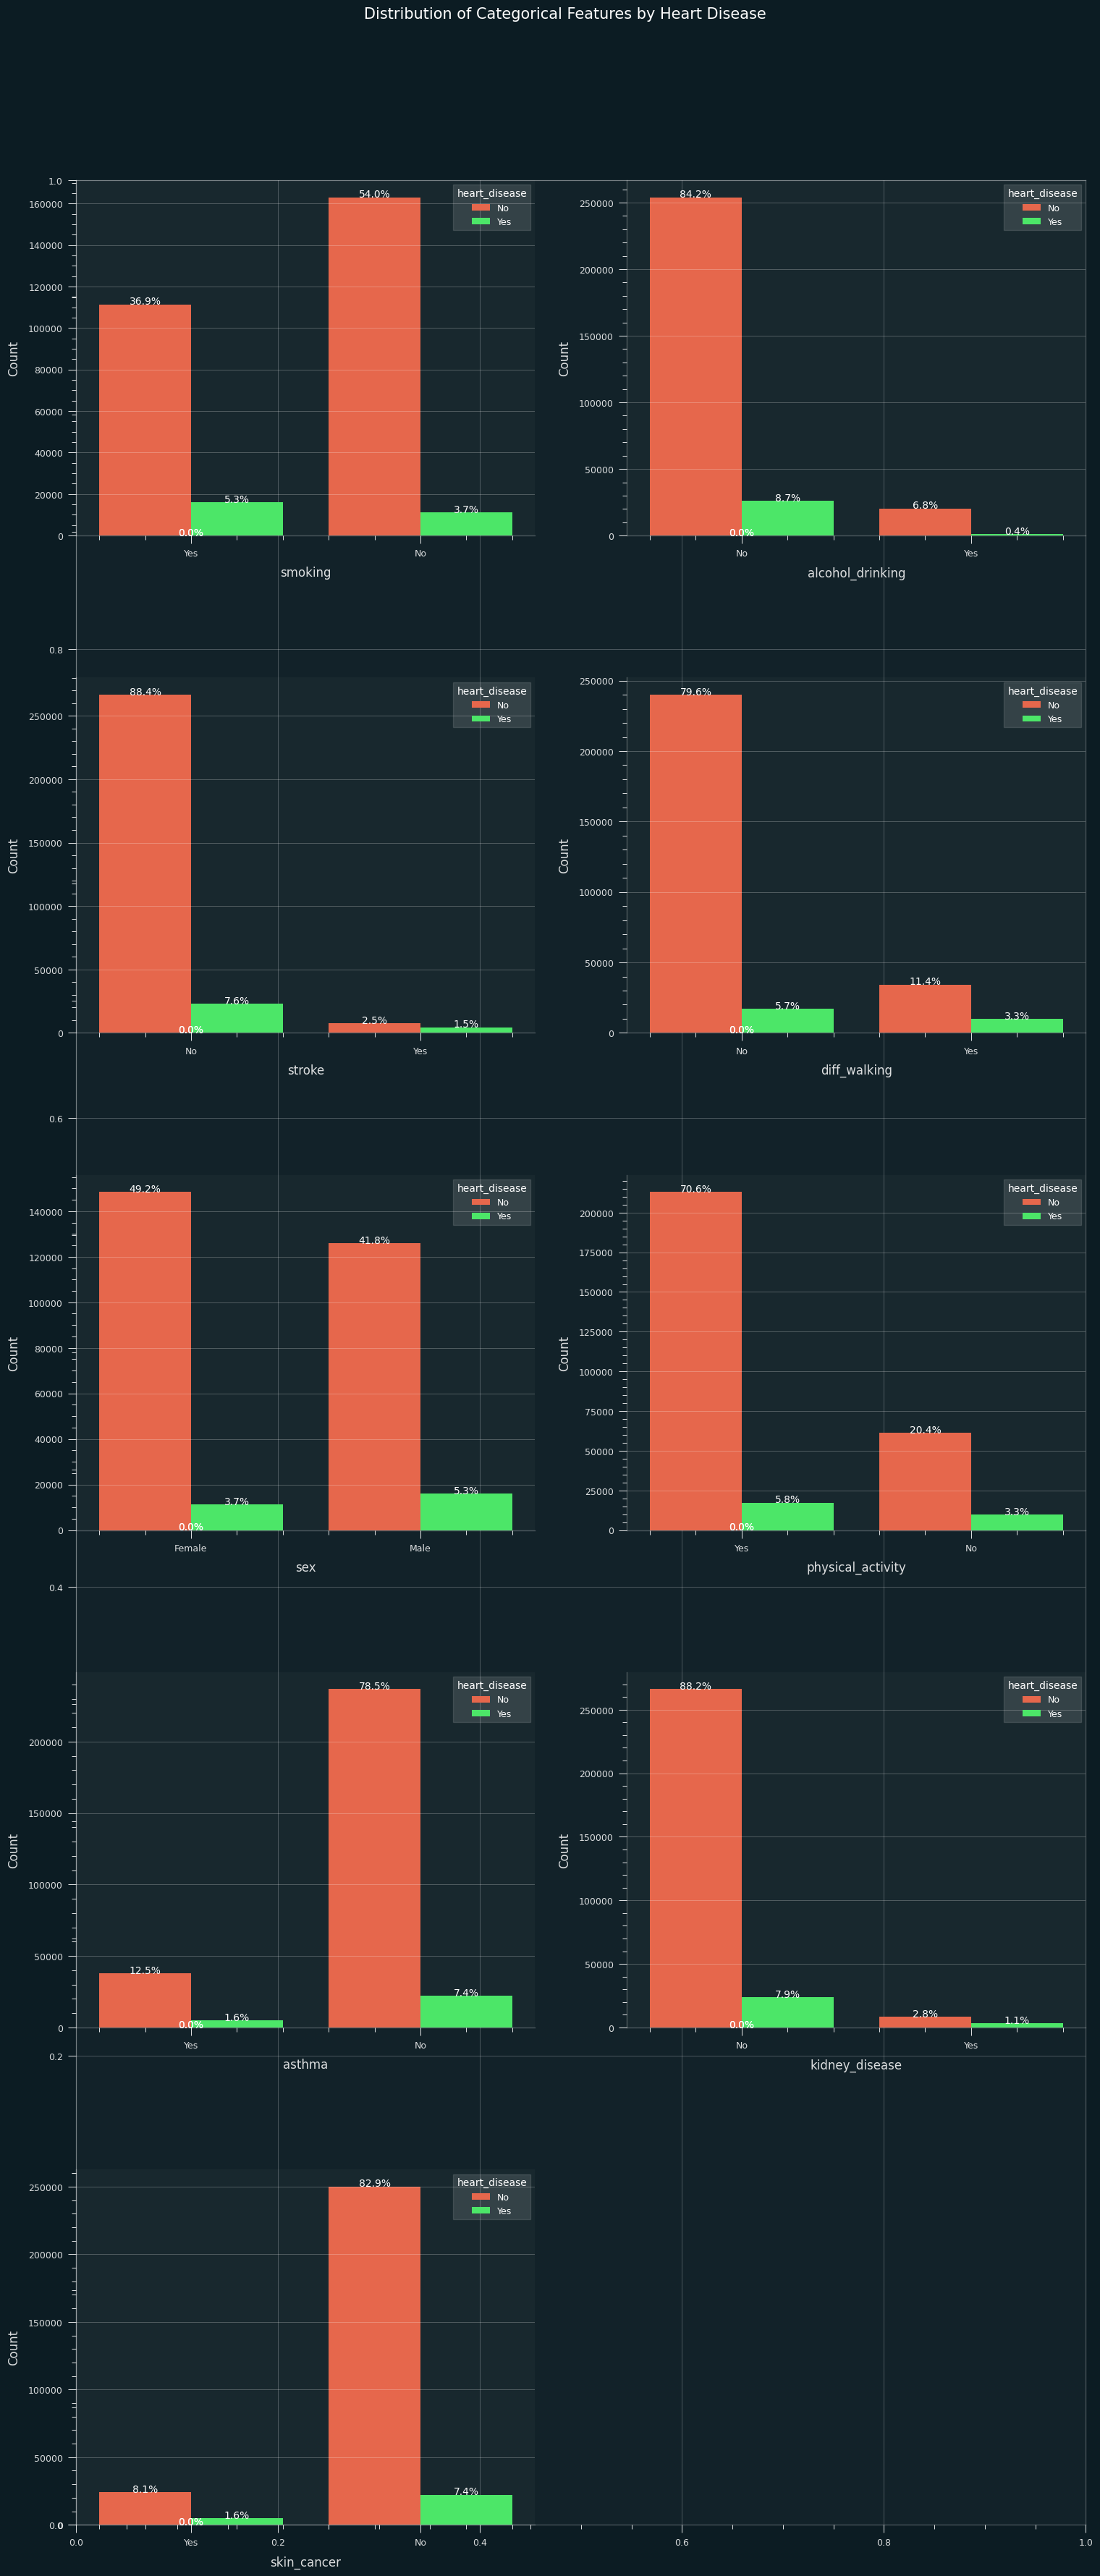

In [16]:
cat_feats = ['smoking', 'alcohol_drinking', 'stroke', 'diff_walking', 'sex', 'physical_activity', 'asthma', 'kidney_disease', 'skin_cancer']
L = len(cat_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(18, 8 * nrow))
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2)  

for i, col in enumerate(cat_feats):
    ax = axs[i // ncol, i % ncol]
    sns.countplot(data=heart_data, x=col, hue="heart_disease", palette=clr_map, ax=ax)  
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    sns.despine(right=True, ax=ax)
    sns.despine(offset=0, trim=False, ax=ax)

    total = float(len(heart_data))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features by Heart Disease', fontsize=15)
plt.show()
L = len(cat_feats)
ncol = 2
nrow = int(np.ceil(L / ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(18, 8 * nrow))
fig.subplots_adjust(top=0.92, hspace=0.4, wspace=0.2)  

for i, col in enumerate(cat_feats):
    ax = axs[i // ncol, i % ncol]
    sns.countplot(data=heart_data, x=col, hue="heart_disease", palette=clr_map, ax=ax)  
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    sns.despine(right=True, ax=ax)
    sns.despine(offset=0, trim=False, ax=ax)

    total = float(len(heart_data))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1f}%'.format((height / total) * 100), ha="center")

if L % 2 != 0:
    axs[-1, -1].axis('off')

plt.suptitle('Distribution of Categorical Features by Heart Disease', fontsize=15)
plt.show()

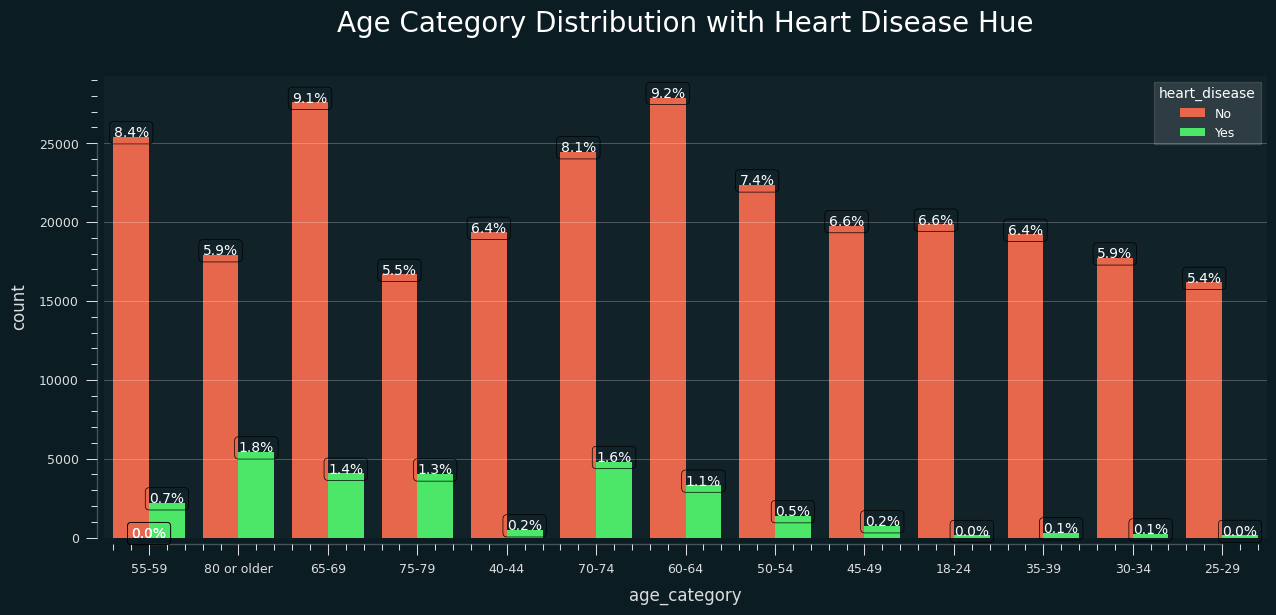

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
total = float(len(heart_data))

# Use 'palette' to specify color map and remove the 'template' parameter
ax = sns.countplot(x='age_category', hue='heart_disease', data=heart_data, palette=clr_map)


# Calculate and annotate the percentage above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f}%'.format((height / total) * 100), ha="center",
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))

# Set the title and adjust the layout
ax.set_title('Age Category Distribution with Heart Disease Hue', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()


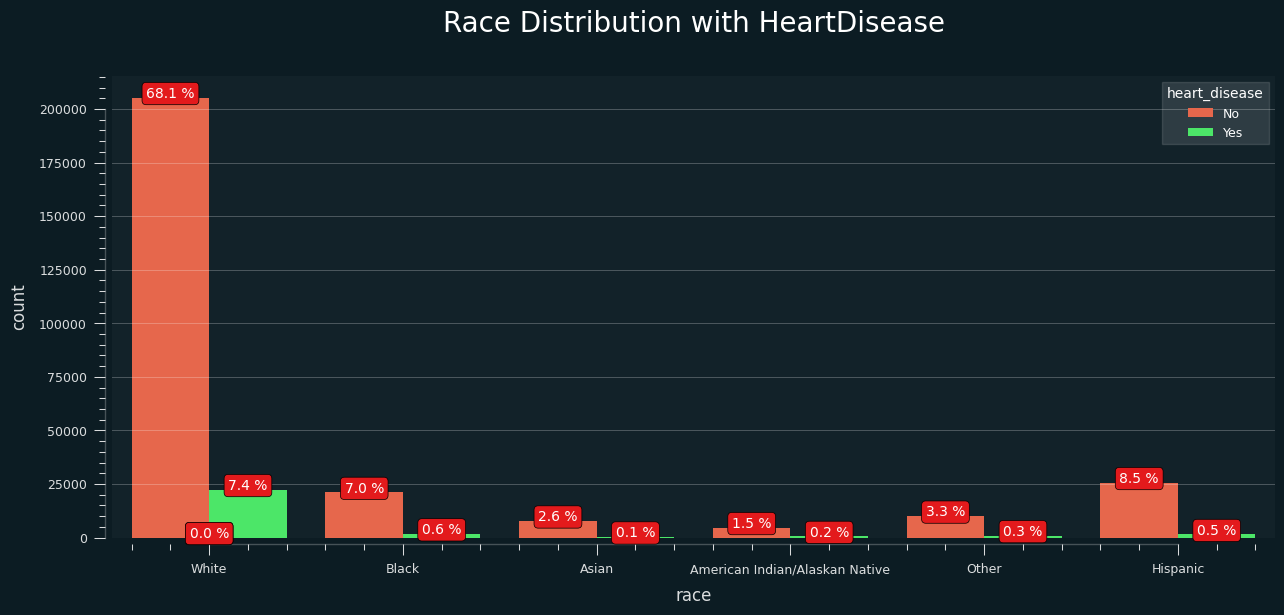

In [18]:
plt.figure(figsize=(15, 6))
total = float(len(heart_data))

ax = sns.countplot(x='race', hue='heart_disease', data=heart_data, palette=clr_map)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center",
            bbox=dict( edgecolor='black', boxstyle='round', linewidth=0.5))

ax.set_title('Race Distribution with HeartDisease', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

plt.show()

<a id="4.3"></a>
# <h4 style='background:#3bebdc;border-radius: 10px; font-size:120%; font-weight: bold; color:black'><center>CORRELATION MATRIX ANALYSIS</center> </h4>

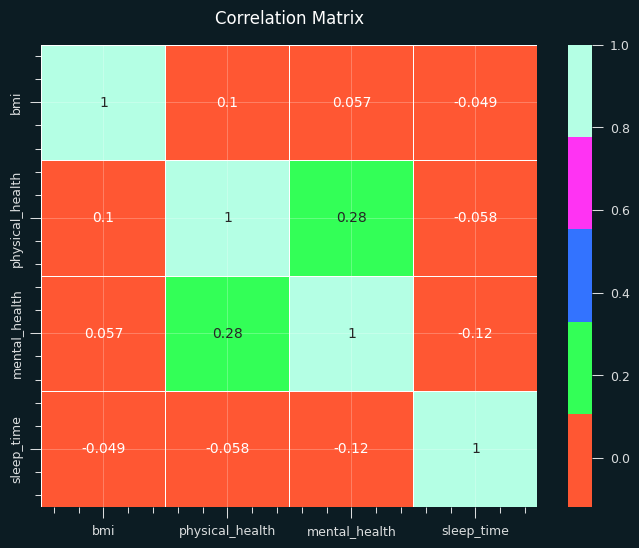

In [19]:
numeric_features = ['bmi', 'physical_health', 'mental_health', 'sleep_time' ]
numeric_corr = heart_data[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_corr, annot=True, cmap=sns.color_palette(clr_map), linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<a id="5"></a>
# <h4 style='background:#b3eb3b;border-radius: 10px; font-size:150%; font-weight: bold; color:black'> <center>DATA PROCESSING</center> </h4>

In [20]:
data_new = heart_data.copy() ### taking caopy of the dataset

<a id="5.1"></a>
# <h4 style='background:#b3eb3b;border-radius: 10px; font-size:150%; font-weight: bold; color:black'> <center>OUTLAIR DETECTION AND REMOVE</center> </h4>

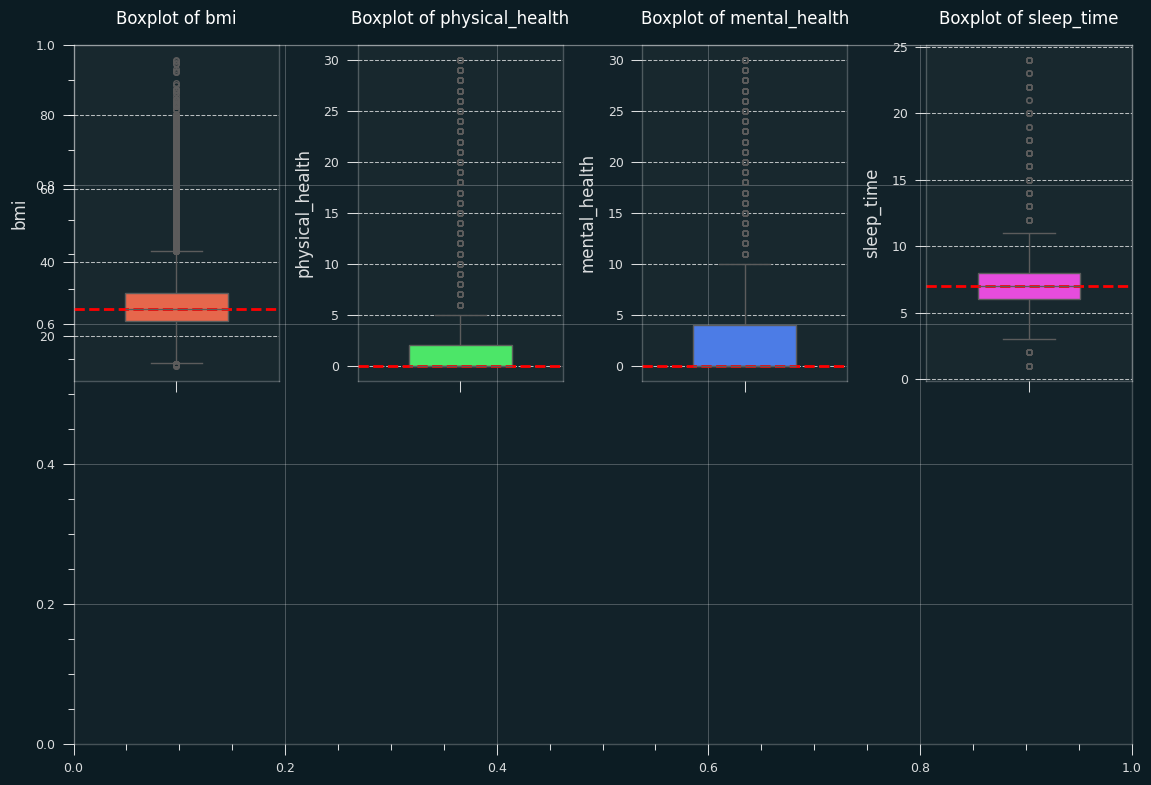

In [21]:
numerical_cols = ['bmi', 'physical_health', 'mental_health', 'sleep_time']

palette = sns.color_palette(clr_map)

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=data_new[column], color=palette[i-1], width=0.5)
    plt.axhline(y=data_new[column].median(), color='red', linestyle='--', linewidth=2)
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [22]:
# find the limits
upper_limit = data_new['bmi'].mean() + 3*heart_data['bmi'].std()
lower_limit = data_new['bmi'].mean() - 3*heart_data['bmi'].std()
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 47.846373140105584
lower limit: 9.03756710853801


In [23]:
# Remove outliers from the  column
data_new.drop(data_new[data_new['bmi'] < 17].index, axis = 0, inplace = True)
data_new.drop(data_new[data_new['bmi'] > 41].index, axis = 0, inplace = True)

In [24]:
upper_limit = heart_data['physical_health'].quantile(0.99)
lower_limit = heart_data['physical_health'].quantile(0.01)
print('upper limit:', upper_limit)
print('lower limit:', lower_limit)

upper limit: 30.0
lower limit: 0.0


In [25]:
# Remove outliers from the unemployment column
data_new.drop(data_new[data_new['physical_health'] < 3 ].index, axis = 0, inplace = True)
data_new.drop(data_new[data_new['physical_health'] > 30.0].index, axis = 0, inplace = True)

In [26]:
data_new.drop(data_new[data_new['mental_health'] <-6.0 ].index, axis = 0, inplace = True)
data_new.drop(data_new[data_new['mental_health'] > 10.0].index, axis = 0, inplace = True)

In [27]:
Q1 = heart_data['sleep_time'].quantile(0.25)
Q3 = heart_data['sleep_time'].quantile(0.75)
IQR = Q3-Q1

print(Q1)
print(Q3)
print(IQR)


6.0
8.0
2.0


In [28]:
# Define upper and lower limits based on IQR
upper_limit_iqr = Q3 + (1.5 * IQR)
lower_limit_iqr = Q1 - (1.5 * IQR)
print(upper_limit_iqr)
print(lower_limit_iqr)

11.0
3.0


In [29]:
# Remove outliers from the unemployment column
data_new.drop(data_new[data_new['sleep_time'] < 3].index, axis = 0, inplace = True)
data_new.drop(data_new[data_new['sleep_time'] > 11].index, axis = 0, inplace = True)

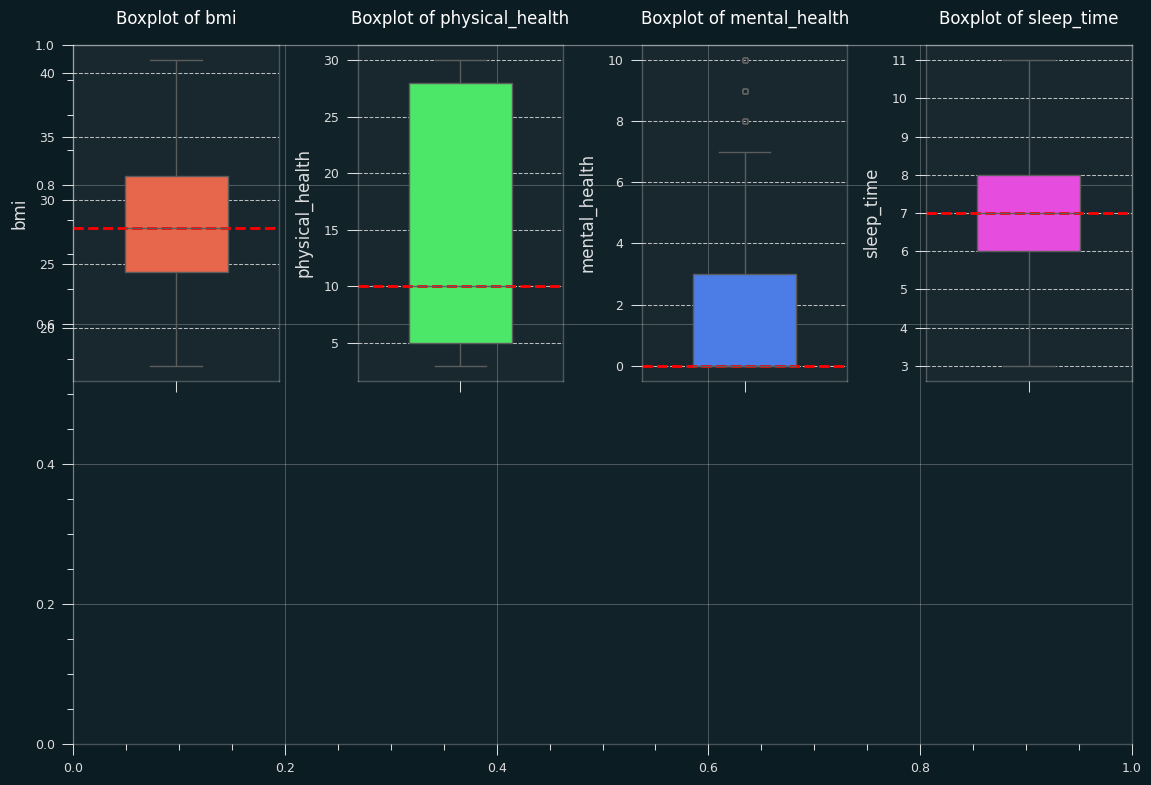

In [30]:
numerical_cols = ['bmi', 'physical_health', 'mental_health', 'sleep_time']

palette = sns.color_palette(clr_map)

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=data_new[column], color=palette[i-1], width=0.5)
    plt.axhline(y=data_new[column].median(), color='red', linestyle='--', linewidth=2)
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

<a id="5.2"></a>
# <h4 style='background:#b3eb3b;border-radius: 5px; font-size:120%; font-weight: bold; color:black'> <center>ENCODING CATEGORICAL VARIABLES</center> </h4>

In [31]:
heart_df = data_new.copy()

In [32]:
print(list(heart_df.columns))

['heart_disease', 'bmi', 'smoking', 'alcohol_drinking', 'stroke', 'physical_health', 'mental_health', 'diff_walking', 'sex', 'age_category', 'race', 'diabetic', 'physical_activity', 'gen_health', 'sleep_time', 'asthma', 'kidney_disease', 'skin_cancer']


In [33]:
binary_columns = ['heart_disease', 'smoking', 'alcohol_drinking', 'stroke', 'diff_walking', 'physical_activity' , 'asthma', 'kidney_disease', 'skin_cancer']

for column in binary_columns:
   heart_df[column] = heart_df[column].replace({'No':0 , 'Yes':1}) 

In [34]:
heart_df['sex'] = heart_df['sex'].replace({'Female':0 ,  'Male':1}) 

In [35]:
heart_df['gen_health'] = heart_df['gen_health'].map({'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4})   

In [36]:
heart_df['diabetic'] = heart_df['diabetic'].replace({'No':0 , 'No, borderline diabetes':1 ,  'Yes (during pregnancy)':2 , 'Yes':3}) 

In [37]:
col = 'sleep_time'
heart_df.loc[ (heart_df[col] <= 6) , col ] = 0 
heart_df.loc[ (heart_df[col] > 6) & (heart_df[col] <= 8 ) , col ] = 1
heart_df.loc[ (heart_df[col] > 8 ) & (heart_df[col] <=24), col ] = 2  

In [38]:
cols =['physical_health' ,'mental_health']

for col in cols:
        heart_df.loc[ heart_df[col] <=10 , col ] = 0
        heart_df.loc[ (heart_df[col] > 10) & (heart_df[col] <=20 ) , col ] = 1
        heart_df.loc[ (heart_df[col] > 20) & (heart_df[col] <=25 ) , col ] = 2
        heart_df.loc[ (heart_df[col] > 25) & (heart_df[col] <=30 ) , col ] = 3
        
heart_df[cols[0]].value_counts()  

physical_health
0.0    24641
3.0    11201
1.0     7400
2.0     1096
Name: count, dtype: int64

In [39]:
heart_df.head()

,heart_disease,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
4,0,23.71,0,0,0,3.0,0.0,1,0,40-44,White,0,1,3,1.0,0,0,0
6,0,21.63,0,0,0,1.0,0.0,0,0,70-74,White,0,1,1,0.0,1,0,1
7,0,31.64,1,0,0,0.0,0.0,1,0,80 or older,White,3,0,2,2.0,1,0,0
13,0,28.15,0,0,0,0.0,0.0,1,0,80 or older,White,0,0,2,1.0,0,0,0
16,0,26.26,0,0,0,0.0,0.0,0,0,70-74,White,0,0,3,2.0,0,0,0


<a id="5.3"></a>
# <h6 style='background:#b3eb3b;border-radius: 10px; font-size:120%; font-weight: bold; color:black'><center>Feature Extraction</center> </h6>


##### AgeCategories
* young(30<=AgeCategory <35)*
* mature(35<=AgeCategory <50)*
* senior(50<=AgeCategory <65)*
* old(65<=AgeCategory <80)*
* veryold(80<=AgeCategory )*

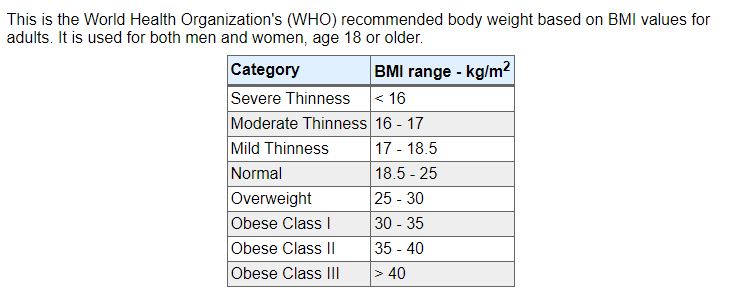

In [40]:
heart_df["bmi"]
print(heart_df["bmi"].unique()  , len(heart_df["bmi"].unique()) , 'unique in') 

[23.71 21.63 31.64 ... 39.31 38.8  35.92] 1712 unique in


In [41]:
######Function used to transform BMI Values to categories
def transform_bmi(value):
    if value<16:
        return 0
    elif value>=16 and value<17:
        return 1
    elif value>=17 and value<18.5:
        return 2
    elif value>=18.5 and value<25:
        return 3
    elif value>=25 and value<30:
        return 4
    elif value>=30 and value<35:
        return 5
    elif value>=35 and value<40:
        return 6
    elif value>=40 :
        return 7


In [42]:
heart_df["bmi"] = heart_df["bmi"].apply(transform_bmi)
heart_df["bmi"].value_counts(ascending= False)

bmi
4    15798
3    12365
5    10134
6     4852
7      621
2      568
Name: count, dtype: int64

In [43]:
heart_df['age_category']
print(heart_df['age_category'].unique()  , len(heart_df['age_category'].unique()) )

['40-44' '70-74' '80 or older' '65-69' '60-64' '75-79' '55-59' '50-54'
 '18-24' '45-49' '35-39' '30-34' '25-29'] 13


In [44]:
mapping = {'18-24':0, '25-29': 0, '30-34':0, '35-39':1 , 
           '40-44':1,  '45-49':1, '50-54':2, '55-59':'2', 
           '60-64':'2','65-69':'3', '70-74':'3', '75-79':'3', '80 or older':'4'}


heart_df['age_category'] = heart_df['age_category'].replace(mapping)

In [45]:
race_mapping = {
    'American Indian/Alaskan Native': 0,
    'Asian': 1,
    'Black': 2,
    'Hispanic': 3,
    'Other': 4,
    'White': 5
}
heart_df['race'] = heart_df['race'].map(race_mapping).astype(int)

In [46]:
heart_df

,heart_disease,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
4,0,3,0,0,0,3.0,0.0,1,0,1,5,0,1,3,1.0,0,0,0
6,0,3,0,0,0,1.0,0.0,0,0,3,5,0,1,1,0.0,1,0,1
7,0,5,1,0,0,0.0,0.0,1,0,4,5,3,0,2,2.0,1,0,0
13,0,4,0,0,0,0.0,0.0,1,0,4,5,0,0,2,1.0,0,0,0
16,0,4,0,0,0,0.0,0.0,0,0,3,5,0,0,3,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319773,0,4,0,0,0,0.0,0.0,0,0,0,3,0,0,1,1.0,0,0,0
319774,0,3,0,0,0,3.0,0.0,1,0,2,3,3,1,1,1.0,0,0,0
319779,0,3,1,0,0,3.0,0.0,1,0,3,3,0,1,1,0.0,0,0,0
319787,0,6,0,0,0,0.0,0.0,0,1,0,3,0,0,2,2.0,0,0,0


<a id="5.4"></a>
# <h6 style='background:#b3eb3b;border-radius: 10px; font-size:120%; font-weight: bold; color:black'><center>PEARSON CORRELATION ANALYSIS</center> </h6>

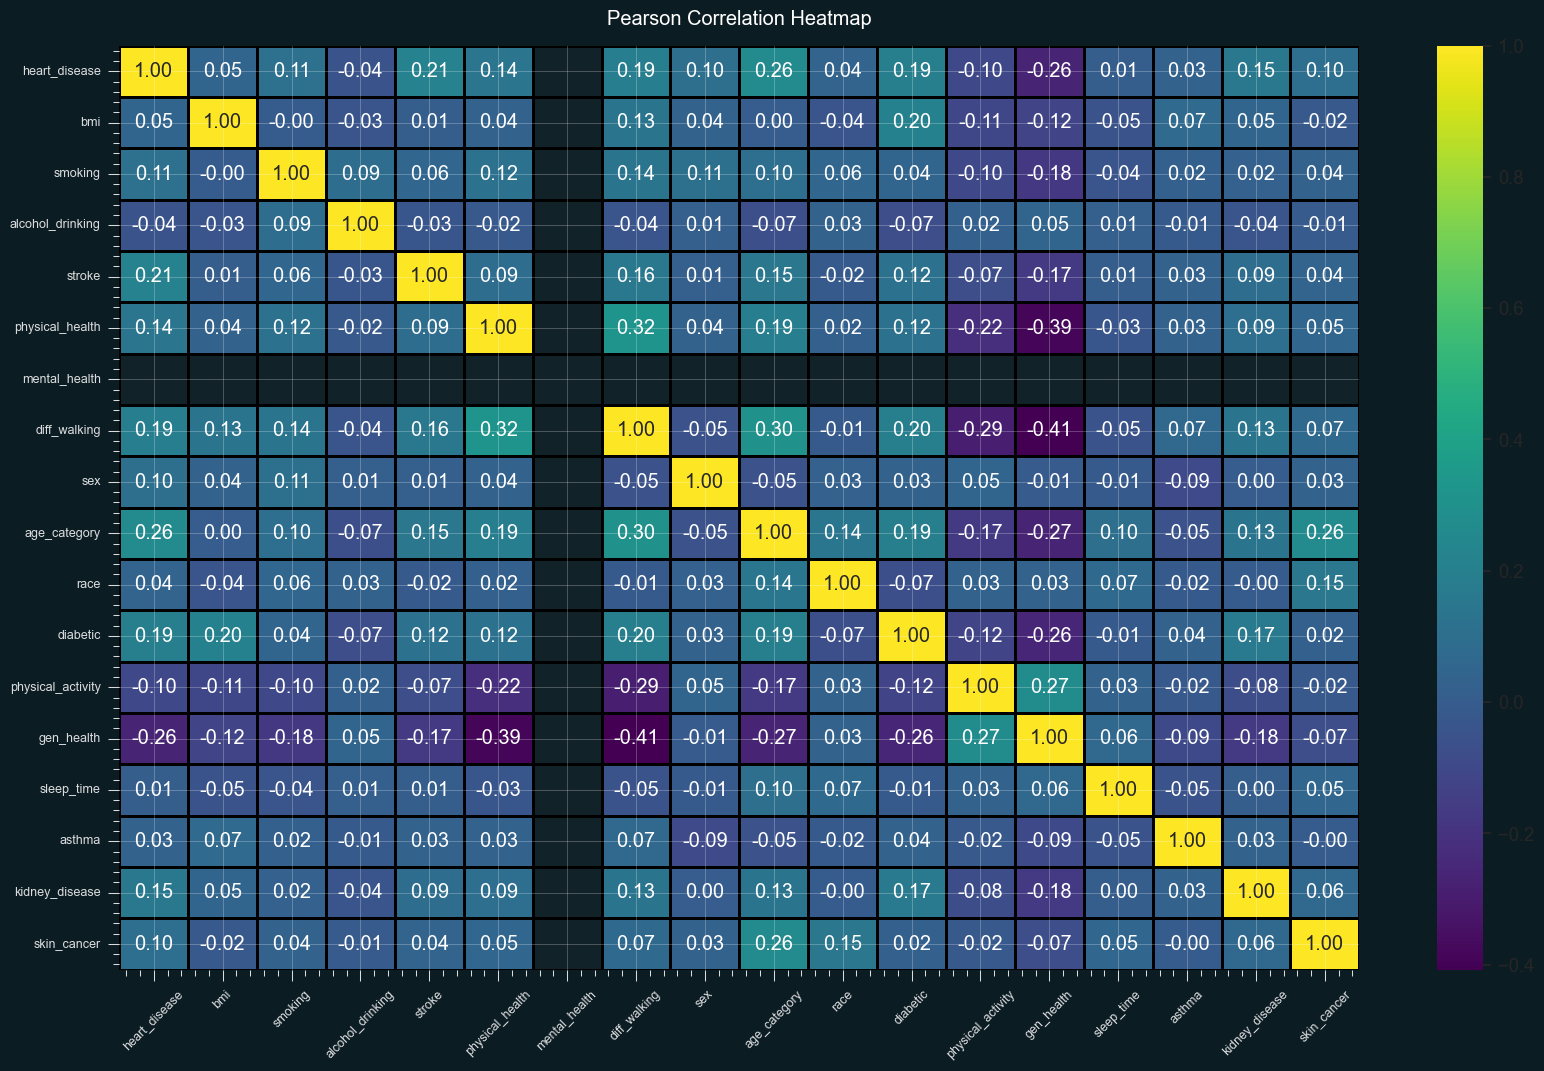

In [47]:
pearson_corr = heart_df.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(20, 12))
sns.set(font_scale=1.2)
sns.heatmap(pearson_corr, annot=True, cmap='viridis', fmt=".2f", linewidths=1, linecolor='black')
plt.title('Pearson Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

<a id="5.5"></a>
# <h6 style='background:#b3eb3b;border-radius: 10px; font-size:150%; font-weight: bold; color:black'><center>HANDLE IMBLACE DATA</center> </h6>

In [48]:
X = heart_df.drop(['heart_disease'], axis=1)
y = heart_df['heart_disease']

In [49]:
scaler = MinMaxScaler(feature_range = (0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)


smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [50]:
print(f"Outcome class size before SMOTE: {y.value_counts()}")
print(f"Outcome class size before SMOTE: {y_resampled.value_counts()}")

Outcome class size before SMOTE: heart_disease
0    37192
1     7146
Name: count, dtype: int64
Outcome class size before SMOTE: heart_disease
0    37192
1    37192
Name: count, dtype: int64


<a id="5.5"></a>
# <h6 style='background:#b3eb3b;border-radius: 10px; font-size:100%; font-weight: bold; color:black'><center>SPILT DATA SET
</center> </h6>

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Print the Shapes of Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (59507, 17)
Shape of testing feature: (14877, 17)
Shape of training label: (59507,)
Shape of testing label: (14877,)


<a id="5.5"></a>
# <h6 style='background:#b3eb3b;border-radius: 10px; font-size:100%; font-weight: bold; color:black'><center>PERSONAL COMPONANT ANALYSIS
</center> </h6>

<Axes: >

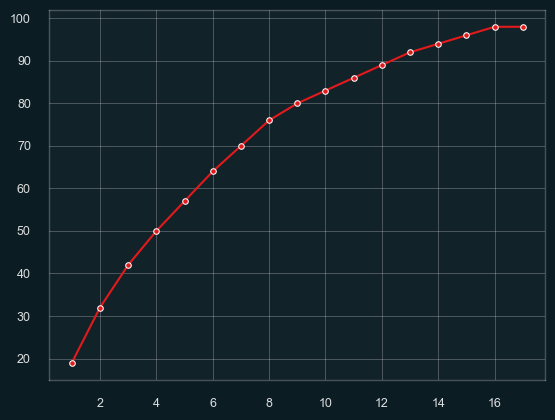

In [52]:
mpl_style(dark=True)
decomposer = PCA(svd_solver='auto')
X_pca = decomposer.fit_transform(X_scaled)
explained_variance = np.cumsum(np.round(decomposer.explained_variance_ratio_, 2) * 100)
components_range = np.arange(1, len(explained_variance) + 1)
sns.lineplot(x=components_range, y=explained_variance, marker='o')

<a id="6"></a>
# <h4 style='background:#d60f47;border-radius: 5px; font-size:150%; font-weight: bold; color:black'> <center>MODEL BUILDING</center> </h4>
<a id="6.1"></a>
# <h4 style='background:#d60f47;border-radius: 5px; font-size:1O0%; font-weight: bold; color:black'> <center>RANDOM_FOREST_CLASSIFIER</center> </h4>


<a id="6.2"></a>
# <h4 style='background:#d60f47;border-radius: 5px; font-size:1O0%; font-weight: bold; color:black'> <center>HYPERPARAMETER TUNING</center> </h4>

In [53]:
# Define the parameter distribution for RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [50, 100, 200, 300,400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
randomized_search_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Perform RandomizedSearchCV
randomized_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = randomized_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_params_rf}")





Best Hyperparameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}


<a id="6.1.2"></a>
# <h4 style='background:#d60f47;border-radius: 5px; font-size:1O0%; font-weight: bold; color:black'> <center>EVALUATION MODEL</center> </h4>

In [54]:
# Get the best model
best_rf_model = randomized_search_rf.best_estimator_

# Make predictions on the test set
rf_predicted = best_rf_model.predict(X_test)

# Calculate accuracy
rf_acc_score = accuracy_score(y_test, rf_predicted)

<a id="6.1.2.1"></a>
# <h4 style='background:#d60f47;border-radius: 5px; font-size:1O0%; font-weight: bold; color:black'> <center>CLASSIFICATION REPORT</center> </h4>

In [55]:

# Print classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predicted))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7572
           1       0.91      0.88      0.89      7305

    accuracy                           0.90     14877
   macro avg       0.90      0.90      0.90     14877
weighted avg       0.90      0.90      0.90     14877



<a id="6.1.2.2"></a>
# <h4 style='background:#d60f47;border-radius: 5px; font-size:1O0%; font-weight: bold; color:black'> <center>CONFUSION MATRIX</center> </h4>

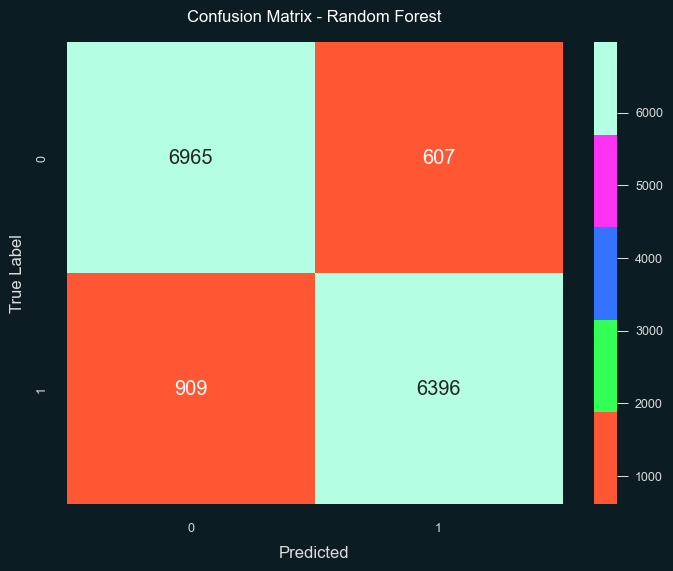

In [56]:
# Calculate confusion matrix
y_pred_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, (y_pred_prob_rf > 0.5).astype(int))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap=clr_map, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True Label')  
plt.title('Confusion Matrix - Random Forest')
plt.show()


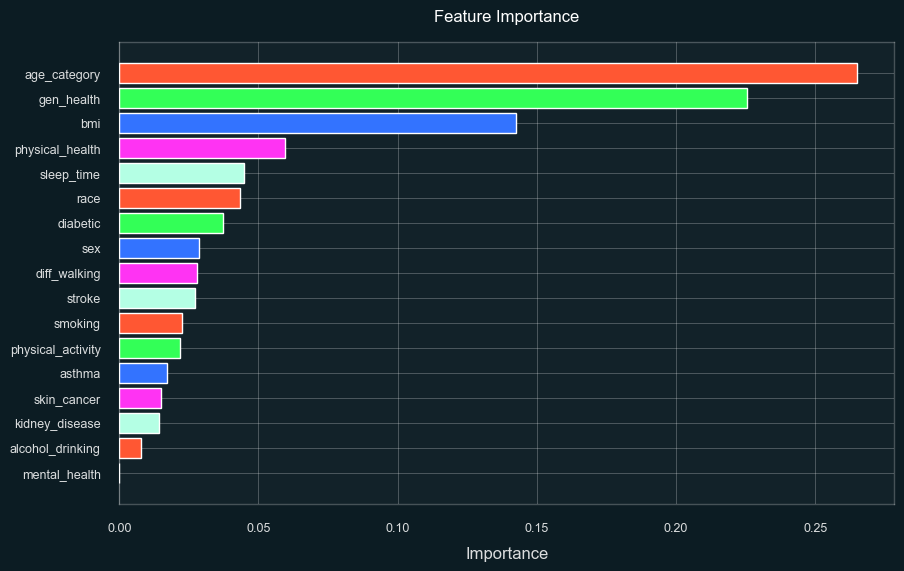

In [57]:
feature_importance_values = best_rf_model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_values})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=clr_map)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

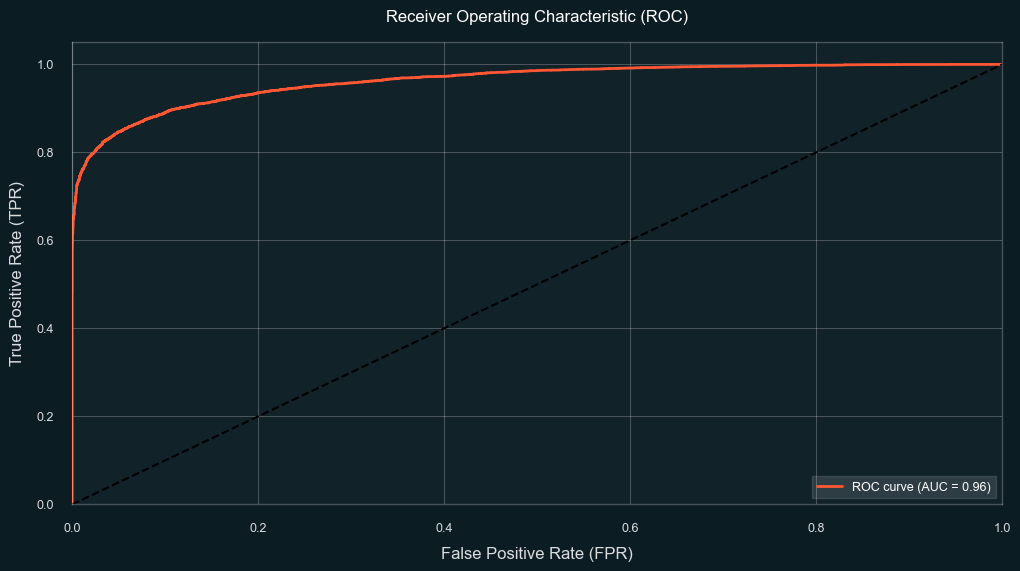

Area Under Curve (AUC): 0.9618101814639691


In [58]:
y_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, color='#FF5733', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print("Area Under Curve (AUC):", roc_auc)

<a id="5.5"></a>
# <h6 style='background:#b3eb3b;border-radius: 10px; font-size:100%; font-weight: bold; color:black'><center>CONCLUTION
</center> </h6>

Conclusion of Feature Analysis for Heart Disease
Age (AgeCategory): Age is a crucial determinant of heart disease risk. The likelihood of developing heart issues increases with age.
General Health (GenHealth): Overall health, including genetic predispositions, plays a significant role in predicting heart disease risks.
Body Mass Index (BMI): A higher BMI, often indicative of obesity, is associated with an increased risk of heart disease.
Physical Health (PhysicalHealth): The state of an individual’s physical health and fitness levels are key indicators of potential heart disease risks.
Sleep Time (SleepTime): Sleep habits significantly impact heart health. Inadequate or poor-quality sleep is linked to a heightened risk of heart disease.
Difficulty Walking (DiffWalking): Impairments in walking ability can be early indicators of cardiovascular issues.
Diabetes: This condition is a known risk factor, heightening susceptibility to heart disease.
Race and Gender: These demographic factors can influence the prevalence and risk levels of heart disease.
Additional Health Conditions: Other health issues such as strokes, asthma, and kidney disease also contribute to the overall assessment of heart disease risk.
This analysis underscores the importance of these factors in constructing predictive models for heart disease, enabling targeted identification of risk factors in individuals.


<a id="5.5"></a>
# <h6 style='background:#b3eb3b;border-radius: 10px; font-size:100%; font-weight: bold; color:black'><center>DROP LESS FEATURE FOR MODEL DEPLOYMENT
</center> </h6>

In [59]:
n_data= heart_data.copy()

In [60]:
n_data.head(5)

,heart_disease,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [61]:
n_data.drop(['smoking','alcohol_drinking','stroke','mental_health','physical_activity','asthma','kidney_disease','skin_cancer'], axis=1, inplace=True)

In [62]:
n_data.head()

,heart_disease,bmi,physical_health,diff_walking,sex,age_category,race,diabetic,gen_health,sleep_time
0,No,16.60,3.0,No,Female,55-59,White,Yes,Very good,5.0
1,No,20.34,0.0,No,Female,80 or older,White,No,Very good,7.0
2,No,26.58,20.0,No,Male,65-69,White,Yes,Fair,8.0
3,No,24.21,0.0,No,Female,75-79,White,No,Good,6.0
4,No,23.71,28.0,Yes,Female,40-44,White,No,Very good,8.0


In [63]:
# Save to CSV
n_data.to_csv('modified_dataset.csv', index=False)